In [1]:
import numpy as np 
import pandas as pd
 

In [2]:
%%capture
! pip install seaborn
import matplotlib.pyplot as plt
import seaborn as sns
import pylab as pl
%matplotlib inline

In [3]:
df = pd.read_csv('Data-Collisions.csv')

C:\Users\ferro\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
print(df)

        SEVERITYCODE           X          Y  OBJECTID  INCKEY  COLDETKEY  \
0                  2 -122.323148  47.703140         1    1307       1307   
1                  1 -122.347294  47.647172         2   52200      52200   
2                  1 -122.334540  47.607871         3   26700      26700   
3                  1 -122.334803  47.604803         4    1144       1144   
4                  2 -122.306426  47.545739         5   17700      17700   
...              ...         ...        ...       ...     ...        ...   
194668             2 -122.290826  47.565408    219543  309534     310814   
194669             1 -122.344526  47.690924    219544  309085     310365   
194670             2 -122.306689  47.683047    219545  311280     312640   
194671             2 -122.355317  47.678734    219546  309514     310794   
194672             1 -122.289360  47.611017    219547  308220     309500   

       REPORTNO   STATUS      ADDRTYPE   INTKEY  ... ROADCOND  \
0       3502005  Match

In [5]:
df1 = df.drop(columns=['X', 'Y','COLLISIONTYPE','OBJECTID', 'INCKEY', 'COLDETKEY','REPORTNO', 'STATUS','INTKEY', 'SEVERITYCODE.1','EXCEPTRSNCODE', 'EXCEPTRSNDESC', 'PERSONCOUNT', 'PEDCOUNT','SDOT_COLCODE','PEDCYLCOUNT', 'INATTENTIONIND', 'SDOTCOLNUM','SPEEDING', 'ST_COLDESC', 'SEGLANEKEY','CROSSWALKKEY', 'PEDROWNOTGRNT','UNDERINFL', 'HITPARKEDCAR'])


In [6]:
df1.head(50)

,SEVERITYCODE,ADDRTYPE,LOCATION,SEVERITYDESC,VEHCOUNT,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLDESC,WEATHER,ROADCOND,LIGHTCOND,ST_COLCODE
0,2,Intersection,5TH AVE NE AND NE 103RD ST,Injury Collision,2,2013/03/27 00:00:00+00,3/27/2013 2:54:00 PM,At Intersection (intersection related),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Overcast,Wet,Daylight,10
1,1,Block,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,Property Damage Only Collision,2,2006/12/20 00:00:00+00,12/20/2006 6:55:00 PM,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",Raining,Wet,Dark - Street Lights On,11
2,1,Block,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,Property Damage Only Collision,3,2004/11/18 00:00:00+00,11/18/2004 10:20:00 AM,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",Overcast,Dry,Daylight,32
3,1,Block,2ND AVE BETWEEN MARION ST AND MADISON ST,Property Damage Only Collision,3,2013/03/29 00:00:00+00,3/29/2013 9:26:00 AM,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Clear,Dry,Daylight,23
4,2,Intersection,SWIFT AVE S AND SWIFT AV OFF RP,Injury Collision,2,2004/01/28 00:00:00+00,1/28/2004 8:04:00 AM,At Intersection (intersection related),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Raining,Wet,Daylight,10
5,1,Intersection,24TH AVE NW AND NW 85TH ST,Property Damage Only Collision,2,2019/04/20 00:00:00+00,4/20/2019 5:42:00 PM,At Intersection (intersection related),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Clear,Dry,Daylight,10
6,1,Intersection,DENNY WAY AND WESTLAKE AVE,Property Damage Only Collision,2,2008/12/09 00:00:00+00,12/9/2008,At Intersection (intersection related),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Raining,Wet,Daylight,10
7,2,Intersection,BROADWAY AND E PIKE ST,Injury Collision,1,2020/04/15 00:00:00+00,4/15/2020 5:47:00 PM,At Intersection (intersection related),PEDALCYCLIST STRUCK MOTOR VEHICLE FRONT END AT...,Clear,Dry,Daylight,5
8,1,Block,PINE ST BETWEEN 5TH AVE AND 6TH AVE,Property Damage Only Collision,2,2006/06/15 00:00:00+00,6/15/2006 1:00:00 PM,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Clear,Dry,Daylight,32
9,2,Intersection,41ST AVE SW AND SW THISTLE ST,Injury Collision,2,2006/03/20 00:00:00+00,3/20/2006 3:49:00 PM,At Intersection (intersection related),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Clear,Dry,Daylight,10


# First, we'll check how was the weather like the most days where there were traffic accidents.

In [7]:
df2 = df1['WEATHER'].value_counts(normalize=True)

In [8]:
df2.head(60)

Clear                       0.586180
Raining                     0.174823
Overcast                    0.146177
Unknown                     0.079597
Snowing                     0.004784
Other                       0.004388
Fog/Smog/Smoke              0.003001
Sleet/Hail/Freezing Rain    0.000596
Blowing Sand/Dirt           0.000295
Severe Crosswind            0.000132
Partly Cloudy               0.000026
Name: WEATHER, dtype: float64

OK, most of days when there were accidentes, were clear. That's unexpected. 

### Now let's check if there's a relation between weather and the kind of accident.

In [9]:
df_vehicles =df1.groupby(['WEATHER'])['ST_COLCODE'].value_counts(normalize=True)

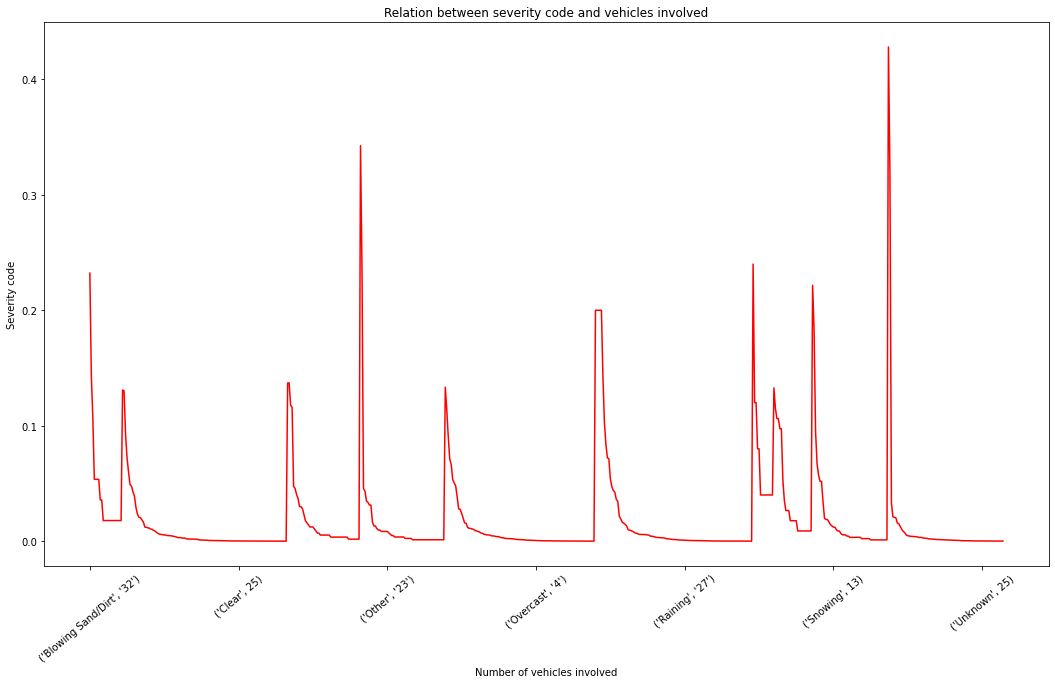

In [10]:
df_vehicles.index = df_vehicles.index.map(str) 
df_vehicles.plot(kind='line', figsize=(18, 10), color = 'red')

plt.title('Relation between severity code and vehicles involved')
plt.ylabel('Severity code')
plt.xlabel('Number of vehicles involved')
plt.xticks(rotation=40)

plt.show() 

### What about location and severity code? 

In [11]:
df1.groupby(['SEVERITYCODE'])['LOCATION'].value_counts(normalize=True)

SEVERITYCODE  LOCATION                                                                
1             BATTERY ST TUNNEL NB BETWEEN ALASKAN WY VI NB AND AURORA AVE N              0.001477
              BATTERY ST TUNNEL SB BETWEEN AURORA AVE N AND ALASKAN WY VI SB              0.001380
              ALASKAN WY VI NB BETWEEN S ROYAL BROUGHAM WAY ON RP AND SENECA ST OFF RP    0.001305
              N NORTHGATE WAY BETWEEN MERIDIAN AVE N AND CORLISS AVE N                    0.001275
              AURORA AVE N BETWEEN N 130TH ST AND N 135TH ST                              0.001126
                                                                                            ...   
2             YALE AVE N BETWEEN THOMAS ST AND HARRISON ST                                0.000017
              YESLER WAY BETWEEN JAMES ST AND OCCIDENTAL AVE S                            0.000017
              YESLER WAY BETWEEN WESTERN AVE AND POST AVE                                 0.000017
              YORK RD 

### Maybe address type?

In [12]:
df1.groupby(['SEVERITYCODE'])['ADDRTYPE'].value_counts(normalize=True)

SEVERITYCODE  ADDRTYPE    
1             Block           0.718590
              Intersection    0.276445
              Alley           0.004965
2             Block           0.518923
              Intersection    0.479663
              Alley           0.001414
Name: ADDRTYPE, dtype: float64

In [13]:
df1.groupby(['SEVERITYCODE'])['JUNCTIONTYPE'].value_counts(normalize=True)

SEVERITYCODE  JUNCTIONTYPE                                     
1             Mid-Block (not related to intersection)              0.539202
              At Intersection (intersection related)               0.272956
              Mid-Block (but intersection related)                 0.118669
              Driveway Junction                                    0.056964
              At Intersection (but not related to intersection)    0.011298
              Ramp Junction                                        0.000858
              Unknown                                              0.000054
2             At Intersection (intersection related)               0.470236
              Mid-Block (not related to intersection)              0.335779
              Mid-Block (but intersection related)                 0.126272
              Driveway Junction                                    0.055963
              At Intersection (but not related to intersection)    0.010781
              Ramp Junct

### Okey, most of the accidents of just material damage where on a mid-block and most of the injuries ones were at an intersection. Still not being very relevant.

##### I'll insist on weather. There's no way that weather isn't relevant at accidents.

In [14]:
df_weather = df1.groupby(['SEVERITYCODE'])['WEATHER'].value_counts(normalize=True)

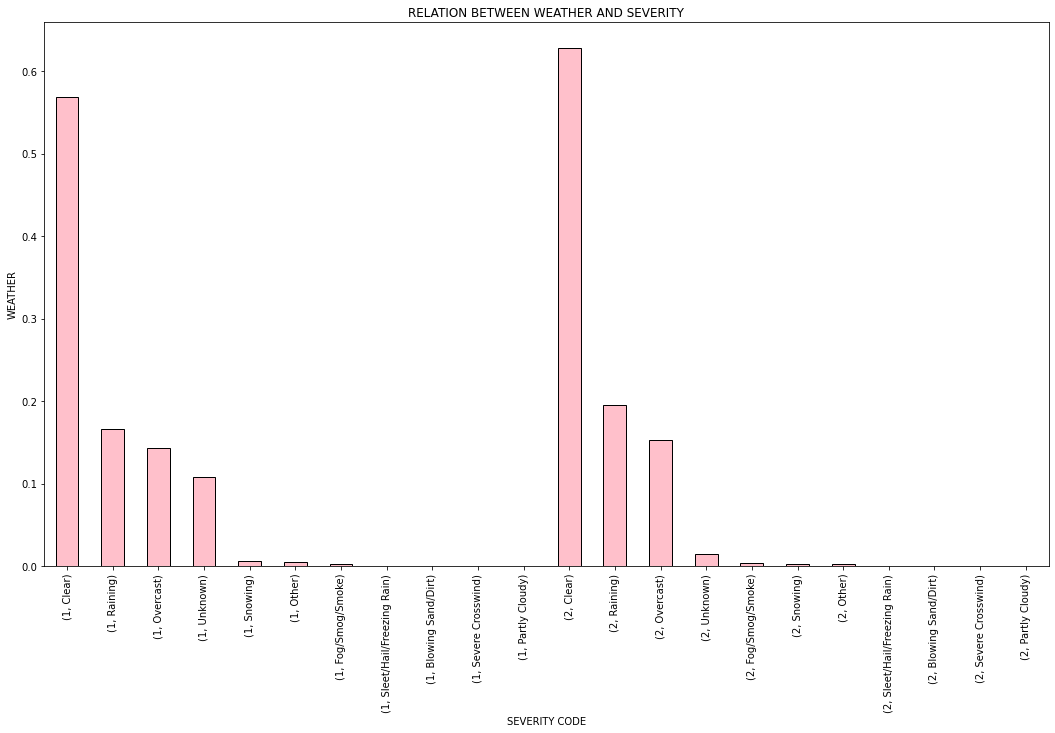

In [15]:
df_weather.plot(kind='bar', figsize=(18, 10), color = 'pink', edgecolor= 'black')

plt.xlabel('SEVERITY CODE') 
plt.ylabel('WEATHER') 
plt.title('RELATION BETWEEN WEATHER AND SEVERITY') 

plt.show()

#### Oh come on, really? most accidents with injuries were at sunny days? 

### Ok, let's think it in another way. In Seattle it rains a lot, but we have data from 2004 to today, so, asumming that there was 150 rainy days per year, counting them for the 16 years we have on our dataset, there were 3440 sunny days and 2400 rainy days. A difference of 1000 days explains easily why were the bigger amount of accidents on sunny days. 
#### What if we check the days with most accidents?

In [16]:
cuenta= df1['INCDATE'].value_counts()

cuenta.head(10)

2006/11/02 00:00:00+00    96
2008/10/03 00:00:00+00    92
2005/05/18 00:00:00+00    84
2005/11/05 00:00:00+00    83
2006/01/13 00:00:00+00    83
2008/10/31 00:00:00+00    82
2005/04/29 00:00:00+00    76
2005/04/15 00:00:00+00    75
2004/12/04 00:00:00+00    74
2007/10/19 00:00:00+00    74
Name: INCDATE, dtype: int64

#### 96 accidents on a day!? what happened that day?

In [17]:
eureka = df1.loc[df['INCDATE'] == '2008/10/03 00:00:00+00']

eureka.head(50)

,SEVERITYCODE,ADDRTYPE,LOCATION,SEVERITYDESC,VEHCOUNT,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLDESC,WEATHER,ROADCOND,LIGHTCOND,ST_COLCODE
271,2,Intersection,DAYTON AVE N AND N 92ND ST,Injury Collision,2,2008/10/03 00:00:00+00,10/3/2008,At Intersection (intersection related),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Overcast,Dry,Daylight,10
1540,1,Block,CHERRY ST BETWEEN 3RD AVE AND 4TH AVE,Property Damage Only Collision,2,2008/10/03 00:00:00+00,10/3/2008,Mid-Block (but intersection related),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Clear,Dry,Daylight,23
2185,1,Block,E JOHN ST BETWEEN 12TH AVE E AND 13TH AVE E,Property Damage Only Collision,2,2008/10/03 00:00:00+00,10/3/2008,Mid-Block (but intersection related),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",Raining,Wet,Daylight,14
59374,1,Intersection,ALASKAN WAY AND COLUMBIA ST,Property Damage Only Collision,2,2008/10/03 00:00:00+00,10/3/2008,At Intersection (intersection related),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",Raining,Wet,Daylight,32
59458,1,Block,DEXTER AVE N BETWEEN 4TH S AVE N AND WESTLAKE ...,Property Damage Only Collision,2,2008/10/03 00:00:00+00,10/3/2008,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",Raining,Wet,Dark - Street Lights On,32
59759,1,Block,66TH AVE S BETWEEN S PRENTICE ST AND S BANGOR ST,Property Damage Only Collision,2,2008/10/03 00:00:00+00,10/3/2008,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",Raining,Wet,Daylight,32
59969,1,Block,1ST AVE BETWEEN BELL ST AND BATTERY ST,Property Damage Only Collision,2,2008/10/03 00:00:00+00,10/3/2008,Mid-Block (but intersection related),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",Raining,Wet,Daylight,16
60036,2,Intersection,12TH AVE AND E MADISON ST,Injury Collision,1,2008/10/03 00:00:00+00,10/3/2008,At Intersection (intersection related),MOTOR VEHCILE STRUCK PEDESTRIAN,Raining,Wet,Dark - Street Lights Off,1
60182,1,Intersection,ASHWORTH AVE N AND N 85TH ST,Property Damage Only Collision,2,2008/10/03 00:00:00+00,10/3/2008,At Intersection (intersection related),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Raining,Wet,Dark - Street Lights On,10
60254,1,Block,SENECA ST BETWEEN 1ST AVE AND 2ND AVE,Property Damage Only Collision,2,2008/10/03 00:00:00+00,10/3/2008,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Raining,Wet,Dusk,32


# IT RAINED. A LOT!

#### Is this just coincide? is this just fantasy? Let's try the second day.

In [18]:
eureka = df1.loc[df['INCDATE'] == '2006/11/02 00:00:00+00']

eureka.head(50)

,SEVERITYCODE,ADDRTYPE,LOCATION,SEVERITYDESC,VEHCOUNT,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLDESC,WEATHER,ROADCOND,LIGHTCOND,ST_COLCODE
295,1,Block,BATTERY ST TUNNEL NB BETWEEN ALASKAN WY VI NB ...,Property Damage Only Collision,2,2006/11/02 00:00:00+00,11/2/2006,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",Raining,Wet,Other,13
29087,1,Block,2ND AVE BETWEEN BELL ST AND BATTERY ST,Property Damage Only Collision,2,2006/11/02 00:00:00+00,11/2/2006,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",Raining,Wet,Dark - Street Lights On,19
29837,1,Intersection,5TH AVE AND SPRING ST,Property Damage Only Collision,2,2006/11/02 00:00:00+00,11/2/2006,At Intersection (intersection related),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Overcast,Wet,Daylight,10
29870,1,Block,STONE AVE N BETWEEN N 115TH ST AND DEAD END 1,Property Damage Only Collision,2,2006/11/02 00:00:00+00,11/2/2006,Driveway Junction,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",Raining,Wet,Daylight,32
29993,1,Block,LAKE CITY WAY NE BETWEEN NE 85TH ST AND 20TH A...,Property Damage Only Collision,4,2006/11/02 00:00:00+00,11/2/2006,Mid-Block (but intersection related),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",Raining,Wet,Daylight,14
30319,1,Intersection,BEACON ER AVE S AND S GRAHAM ST,Property Damage Only Collision,2,2006/11/02 00:00:00+00,11/2/2006,At Intersection (intersection related),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Overcast,Wet,Daylight,28
30797,1,Intersection,MERCER ST AND TAYLOR AVE N,Property Damage Only Collision,2,2006/11/02 00:00:00+00,11/2/2006,At Intersection (intersection related),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Raining,Wet,Daylight,15
30846,1,Intersection,MONTLAKE BLVD E AND E HAMLIN ST,Property Damage Only Collision,2,2006/11/02 00:00:00+00,11/2/2006,At Intersection (intersection related),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Raining,Wet,Dark - Street Lights On,28
30893,2,Intersection,23RD AVE S AND S JACKSON ST,Injury Collision,1,2006/11/02 00:00:00+00,11/2/2006,At Intersection (intersection related),MOTOR VEHCILE STRUCK PEDESTRIAN,Raining,Wet,Dark - Street Lights On,2
31326,1,Intersection,16TH AVE AND E JEFFERSON ST,Property Damage Only Collision,2,2006/11/02 00:00:00+00,11/2/2006,At Intersection (intersection related),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Raining,Wet,Daylight,10


In [19]:
eureka = df1.loc[df['INCDATE'] == '2005/05/18 00:00:00+00']

eureka.head(50)

,SEVERITYCODE,ADDRTYPE,LOCATION,SEVERITYDESC,VEHCOUNT,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLDESC,WEATHER,ROADCOND,LIGHTCOND,ST_COLCODE
313,1,Block,49TH AVE NE BETWEEN DEAD END 1 AND NE 39TH W ST,Property Damage Only Collision,2,2005/05/18 00:00:00+00,5/18/2005 2:00:00 AM,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",Raining,Wet,Dark - Street Lights On,32
1013,1,Block,3RD AVE BETWEEN VIRGINIA ST AND LENORA ST,Property Damage Only Collision,2,2005/05/18 00:00:00+00,5/18/2005 10:38:00 PM,Mid-Block (but intersection related),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",Overcast,Wet,Dark - Street Lights On,14
1022,2,Block,51ST AVE S BETWEEN S FLETCHER ST AND S CAMBRID...,Injury Collision,4,2005/05/18 00:00:00+00,5/18/2005 1:00:00 PM,Mid-Block (but intersection related),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",Clear,Wet,Daylight,14
14107,1,Block,N 107TH ST BETWEEN WHITMAN AVE N AND AURORA S ...,Property Damage Only Collision,2,2005/05/18 00:00:00+00,5/18/2005 1:44:00 PM,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Clear,Dry,Daylight,22
14544,1,Block,AURORA AVE N BETWEEN N 80TH ST AND N 81ST ST,Property Damage Only Collision,2,2005/05/18 00:00:00+00,5/18/2005 7:10:00 PM,Mid-Block (but intersection related),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",Raining,Wet,Dusk,14
15109,2,Block,DELRIDGE WAY SW BETWEEN SW ORCHARD ST AND SYLV...,Injury Collision,3,2005/05/18 00:00:00+00,5/18/2005 7:20:00 PM,Mid-Block (but intersection related),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",Raining,Wet,Daylight,14
15206,1,Block,M L KING JR WR WAY S BETWEEN S NORFOLK ST AND ...,Property Damage Only Collision,2,2005/05/18 00:00:00+00,5/18/2005 5:58:00 AM,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",Raining,Wet,Dawn,11
15601,2,Block,S MICHIGAN ST BETWEEN 6TH AVE S AND 7TH AVE S,Injury Collision,2,2005/05/18 00:00:00+00,5/18/2005 8:18:00 AM,Driveway Junction,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Raining,Wet,Daylight,22
15735,1,Block,S SPOKANE ST BETWEEN 15TH AVE S AND 16TH AVE S,Property Damage Only Collision,2,2005/05/18 00:00:00+00,5/18/2005 8:24:00 PM,Mid-Block (but intersection related),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",Overcast,Wet,Dusk,14
15894,1,Intersection,30TH AVE NE AND NE 143RD ST,Property Damage Only Collision,2,2005/05/18 00:00:00+00,5/18/2005 4:17:00 PM,At Intersection (intersection related),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Clear,Dry,Daylight,10


In [28]:
cuenta.tail(50)

2010/11/25 00:00:00+00    8
2012/01/28 00:00:00+00    8
2020/05/06 00:00:00+00    8
2020/04/23 00:00:00+00    8
2005/04/26 00:00:00+00    8
2020/04/30 00:00:00+00    8
2020/05/11 00:00:00+00    8
2004/12/27 00:00:00+00    8
2009/12/06 00:00:00+00    8
2019/11/28 00:00:00+00    7
2020/05/09 00:00:00+00    7
2020/05/13 00:00:00+00    7
2020/03/29 00:00:00+00    7
2010/12/26 00:00:00+00    7
2014/12/25 00:00:00+00    7
2004/12/12 00:00:00+00    7
2020/05/03 00:00:00+00    7
2020/03/21 00:00:00+00    6
2020/03/24 00:00:00+00    6
2020/04/06 00:00:00+00    6
2020/05/05 00:00:00+00    6
2020/04/12 00:00:00+00    6
2020/04/27 00:00:00+00    6
2004/12/26 00:00:00+00    6
2020/04/11 00:00:00+00    6
2020/04/07 00:00:00+00    6
2020/04/29 00:00:00+00    6
2020/05/04 00:00:00+00    6
2004/12/13 00:00:00+00    6
2020/04/26 00:00:00+00    5
2020/04/21 00:00:00+00    5
2020/05/16 00:00:00+00    5
2018/12/25 00:00:00+00    5
2020/02/09 00:00:00+00    5
2020/03/23 00:00:00+00    5
2004/12/24 00:00:00+

In [21]:
lessten = df1.loc[df['INCDATE'] == '2018/12/25 00:00:00+00']

lessten.head(50)


,SEVERITYCODE,ADDRTYPE,LOCATION,SEVERITYDESC,VEHCOUNT,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLDESC,WEATHER,ROADCOND,LIGHTCOND,ST_COLCODE
192523,2,Intersection,ROOSEVELT WAY NE AND NE 43RD N ST,Injury Collision,1,2018/12/25 00:00:00+00,12/25/2018 6:53:00 PM,At Intersection (intersection related),MOTOR VEHCILE STRUCK PEDESTRIAN,Overcast,Dry,Dark - Street Lights On,2
193289,1,Block,4TH AVE BETWEEN MARION ST AND MADISON ST,Property Damage Only Collision,2,2018/12/25 00:00:00+00,12/25/2018 6:38:00 AM,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Clear,Wet,Dark - Street Lights On,11
193451,2,Block,N 40TH ST BETWEEN ASHWORTH AVE N AND WOODLAWN ...,Injury Collision,2,2018/12/25 00:00:00+00,12/25/2018 2:37:00 AM,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",Clear,Dry,Dark - Street Lights On,32
193899,1,Intersection,5TH AVE AND SPRING ST,Property Damage Only Collision,2,2018/12/25 00:00:00+00,12/25/2018 7:32:00 PM,At Intersection (intersection related),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Clear,Dry,Dark - Street Lights On,15
194441,2,Block,12TH AVE BETWEEN E OLIVE ST AND E HOWELL ST,Injury Collision,3,2018/12/25 00:00:00+00,12/25/2018 10:07:00 PM,Driveway Junction,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Clear,Dry,Dark - Street Lights On,10


### Now we are talking! let's make a top 10 and a less 10 list of accidents per day and focus on the weather.

In [23]:
topten = [['2006/11/02', 96, 'raining'], ['2008/10/03', 92, 'raining'], ['2005/05/18', 84, 'raining'], ['2006/01/13', 83, 'raining'], ['2005/11/05', 83, 'raining'],['2008/10/31', 82, 'raining'], ['2005/04/29', 76, 'raining'], ['2005/04/15', 75, 'raining'],['2007/10/19', 74, 'raining'], ['2004/12/04', 74, 'raining']]
df = pd.DataFrame(topten, columns = ['Date', 'Amount of accidents', 'Weather']) 
df


,Date,Amount of accidents,Weather
0,2006/11/02,96,raining
1,2008/10/03,92,raining
2,2005/05/18,84,raining
3,2006/01/13,83,raining
4,2005/11/05,83,raining
5,2008/10/31,82,raining
6,2005/04/29,76,raining
7,2005/04/15,75,raining
8,2007/10/19,74,raining
9,2004/12/04,74,raining


#### What about the less 10?

In [29]:
lessten = [['2010/11/25', 8, 'clear'], ['2012/01/28', 8, 'clear'], ['2005/04/26', 8, 'clear'], ['2004/12/27', 8, 'clear'], ['2009/12/06', 8, 'clear'],['2019/11/28', 7, 'clear'], ['2010/12/26', 7, 'clear'], ['2014/12/25', 7, 'Christmas'],['2004/12/12', 7, 'clear'], ['2004/12/26', 7, 'clear']]
df = pd.DataFrame(lessten, columns = ['Date', 'Amount of accidents', 'Weather']) 
df



,Date,Amount of accidents,Weather
0,2010/11/25,8,clear
1,2012/01/28,8,clear
2,2005/04/26,8,clear
3,2004/12/27,8,clear
4,2009/12/06,8,clear
5,2019/11/28,7,clear
6,2010/12/26,7,clear
7,2014/12/25,7,Christmas
8,2004/12/12,7,clear
9,2004/12/26,7,clear


### I didn't count the 2020 accidents because it was half the traffic it uses to. But checking at this list, do you know what have in common most of these days? They are on november and december, when it's fucking freezing and people doesn't go out for a ride.